# Importing Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Loading the dataset**

In [46]:
data = pd.read_csv('C:\\Users\\Madhumitha\\Desktop\\Sarah Job\\Github Projects\\Customer Satisfaction Prediction\\customer_support_tickets.csv')

# Data Exploration

**Checking rows and columns**

In [47]:
data.shape

(8469, 17)

**Checking data types**

In [48]:
data.dtypes

Ticket ID                         int64
Customer Name                    object
Customer Email                   object
Customer Age                      int64
Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Description               object
Ticket Status                    object
Resolution                       object
Ticket Priority                  object
Ticket Channel                   object
First Response Time              object
Time to Resolution               object
Customer Satisfaction Rating    float64
dtype: object

**Displaying first 5 rows**

In [49]:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


**Checking Data Information**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

**Summary of numerical columns**

In [51]:
data.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


**Identilfy Common Issues**

In [52]:
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

**Analyze Customer Support Ticket Trends**

In [53]:
# Convert 'Date of Purchase' to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])

# Extract year and month for ticket trend analysis
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')

# Group by YearMonth and count tickets
ticket_trends = data.groupby('YearMonth').size()

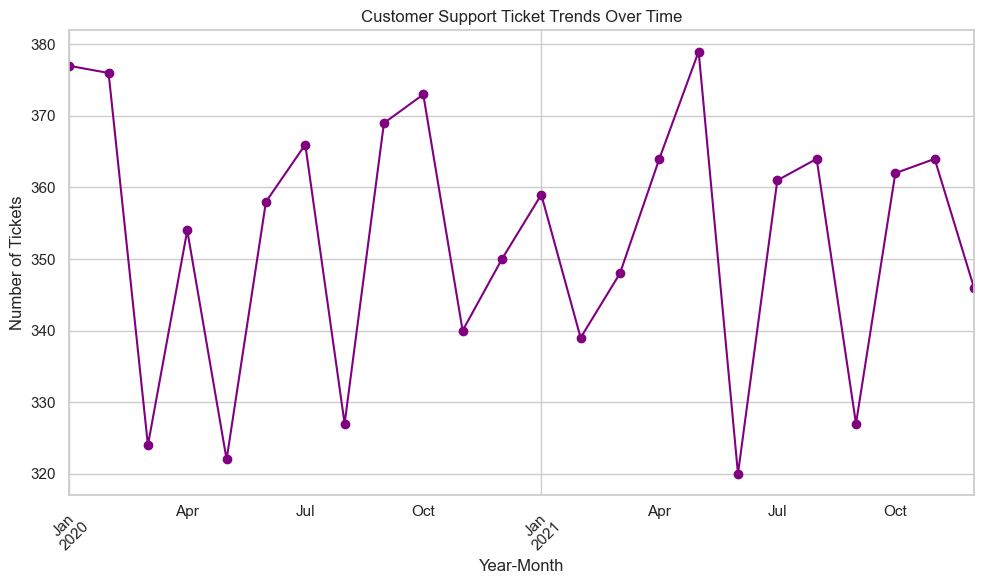

In [54]:
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o', color='purple')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Customer Gender Distribution**

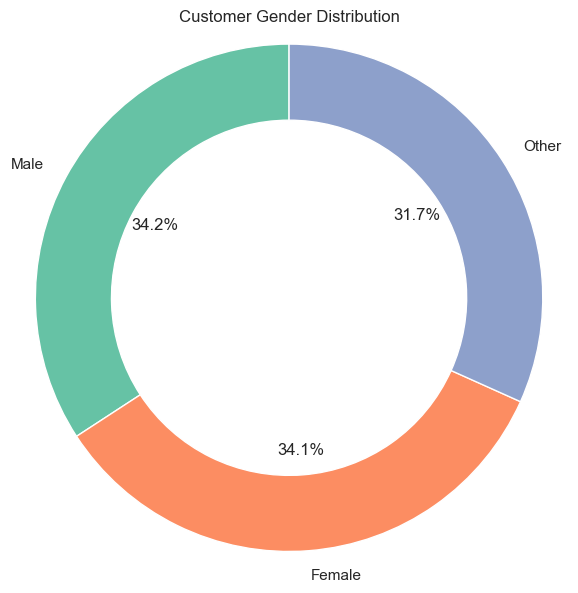

In [55]:
customer_gender_distribution = data['Customer Gender'].value_counts()

plt.figure(figsize=(6, 6))
# Donut chart
plt.pie(customer_gender_distribution,labels=customer_gender_distribution.index,autopct='%1.1f%%',colors=sns.color_palette('Set2'),
    startangle=90,wedgeprops={'width': 0.3})  # Creates the "donut" effect

plt.title('Customer Gender Distribution')
plt.axis('equal')  # Keeps the chart as a circle
plt.tight_layout()
plt.show()

**Customer Satisfaction Distribution**

In [56]:
# 1. Segment Customers Based on Ticket Types
ticket_type_segmentation = data['Ticket Type'].value_counts()
print("\nSegmentation based on Ticket Types:")
print(ticket_type_segmentation)

# 2. Segment Customers Based on Satisfaction Levels
satisfaction_segmentation = data['Customer Satisfaction Rating'].value_counts().sort_index()
print("\nSegmentation based on Customer Satisfaction Levels:")
print(satisfaction_segmentation)


Segmentation based on Ticket Types:
Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

Segmentation based on Customer Satisfaction Levels:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
Name: count, dtype: int64


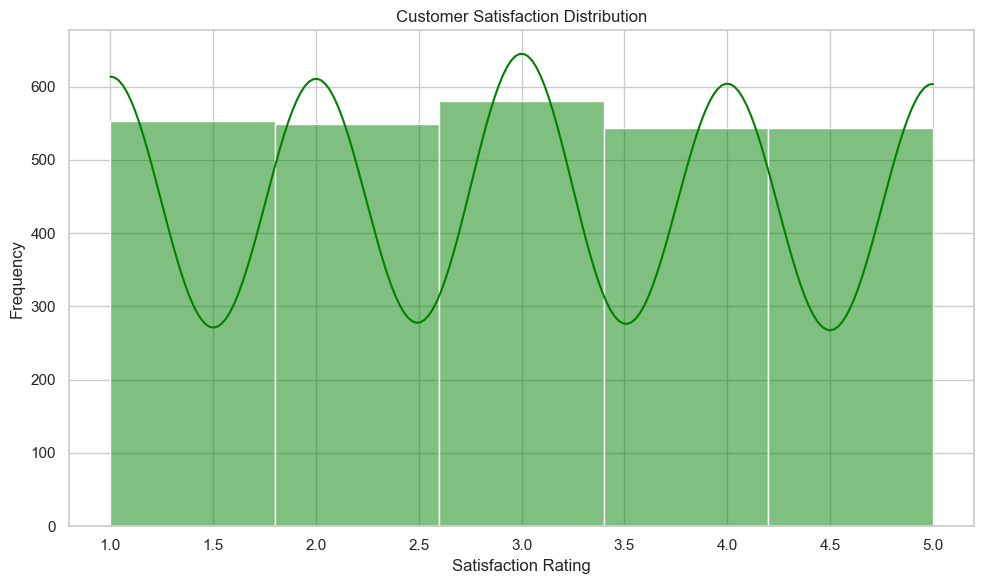

In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True, color='green')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Customer Age Distribution**

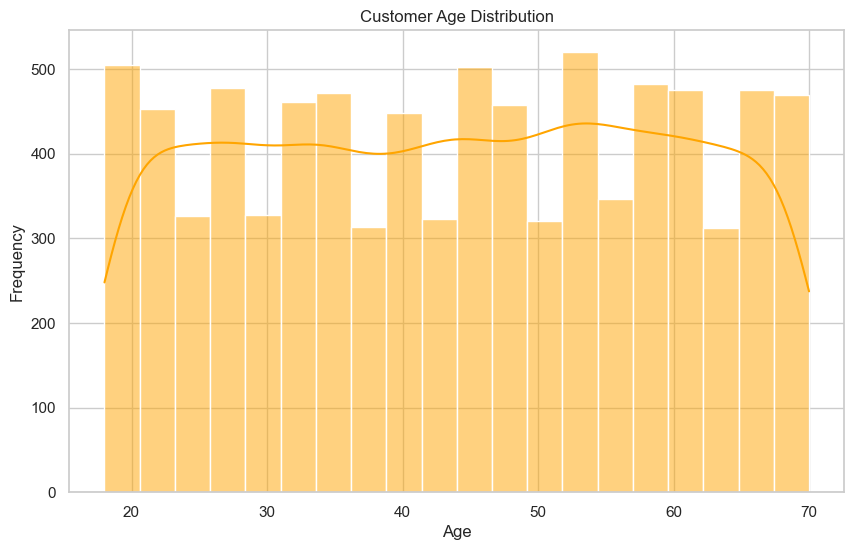

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True, color='orange')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Ticket Channel Distribution**

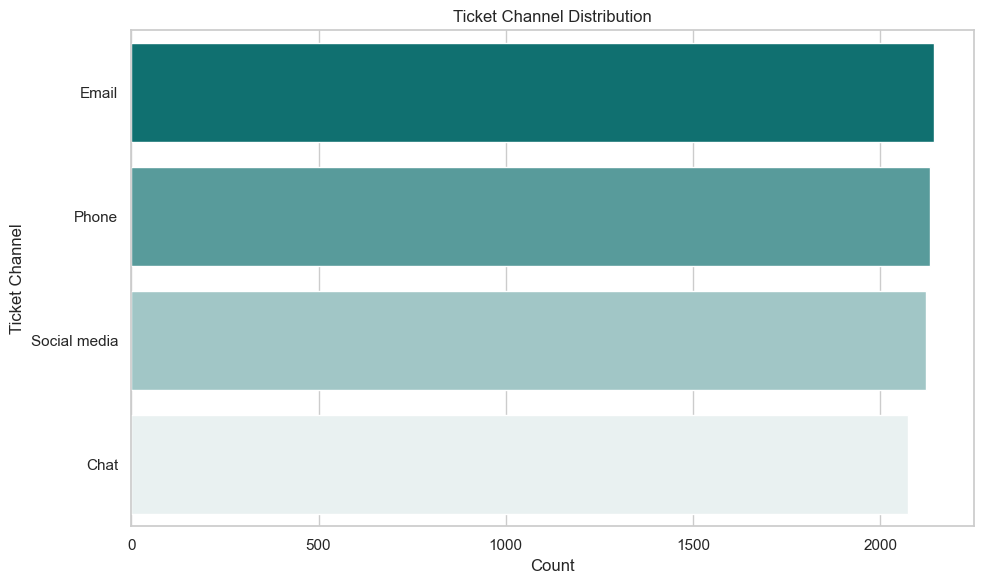

In [59]:
# Assuming 'data' is your dataframe and 'Ticket Channel' is the column you're analyzing
ticket_channel_distribution = data['Ticket Channel'].value_counts()

# Generate a gradient palette with orange from light to dark
colors = sns.light_palette("teal", n_colors=len(ticket_channel_distribution), reverse=True)

# Plotting the horizontal bar chart with shades of orange
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_channel_distribution.values, y=ticket_channel_distribution.index, palette=colors, hue=ticket_channel_distribution.index)

plt.title('Ticket Channel Distribution')
plt.xlabel('Count')
plt.ylabel('Ticket Channel')
plt.tight_layout()
plt.show()

**Product Purchased Distribution**

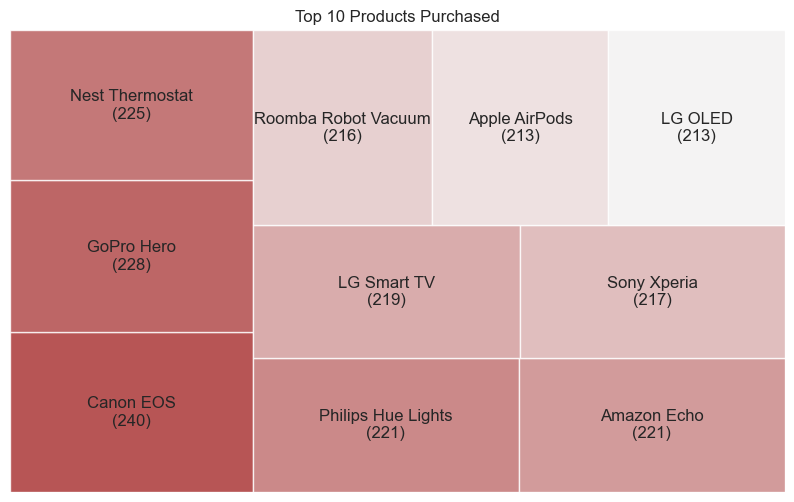

In [60]:
# Treemap for Top 10 Products Purchased 
plt.figure(figsize=(10, 6))
product_purchased_distribution = data['Product Purchased'].value_counts().head(10)
sizes = product_purchased_distribution.values
labels = [f"{product}\n({count})" for product, count in zip(product_purchased_distribution.index, sizes)]
colors = sns.light_palette("brown", n_colors=10, reverse=True) 
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)
plt.title('Top 10 Products Purchased')
plt.axis('off')  # Hide axes for cleaner look
plt.show()

**Tickets Raised by Age Group**

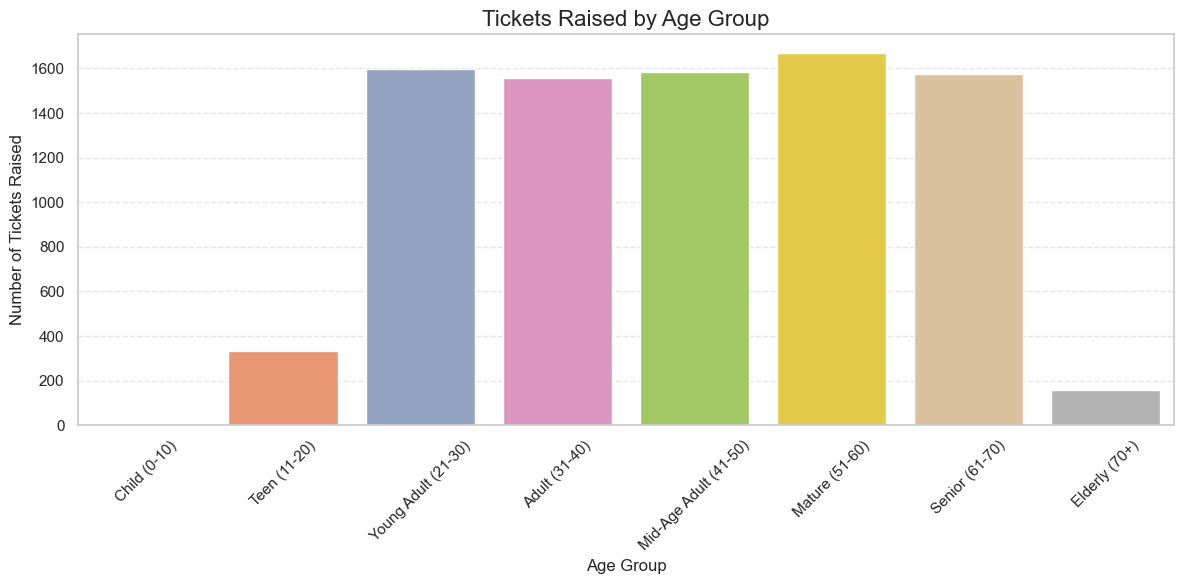

In [61]:
# Define age bins and corresponding labels with names
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
labels = ['Child (0-10)','Teen (11-20)',
          'Young Adult (21-30)','Adult (31-40)',
          'Mid-Age Adult (41-50)','Mature (51-60)',
          'Senior (61-70)','Elderly (70+)']

# Categorize customers into age groups
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

# Calculate number of tickets raised by each age group
tickets_by_age_group = data.groupby('Age Group', observed=False).size()

# Define a color palette with different colors for each bar
colors = sns.color_palette("Set2", n_colors=len(tickets_by_age_group))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=tickets_by_age_group.index,y=tickets_by_age_group.values,hue=tickets_by_age_group.index,palette=colors,legend=False)

# Plotting the data
plt.title('Tickets Raised by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Tickets Raised', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Ticket Type Distribution**

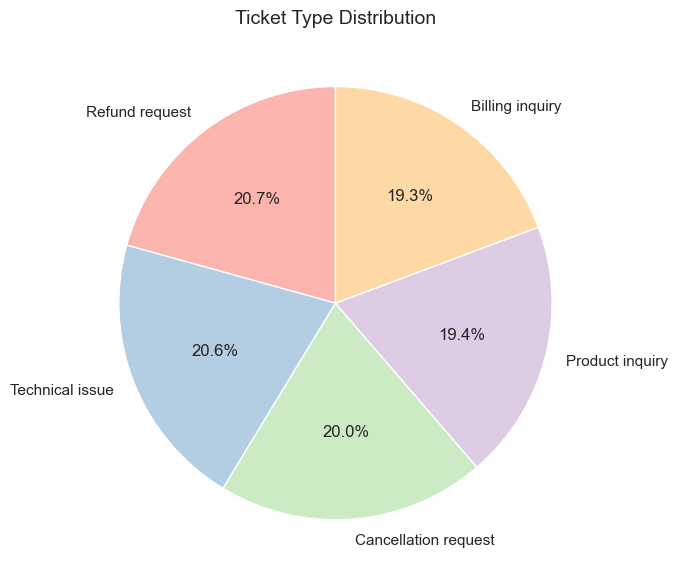

In [62]:
#Count ticket types
ticket_type_distribution = data['Ticket Type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(ticket_type_distribution,labels=ticket_type_distribution.index,autopct='%1.1f%%',startangle=90,
        colors=sns.color_palette("Pastel1", len(ticket_type_distribution)))
plt.title('Ticket Type Distribution', fontsize=14)
plt.tight_layout()
plt.show()

**Ticket Priority Level Distribution**

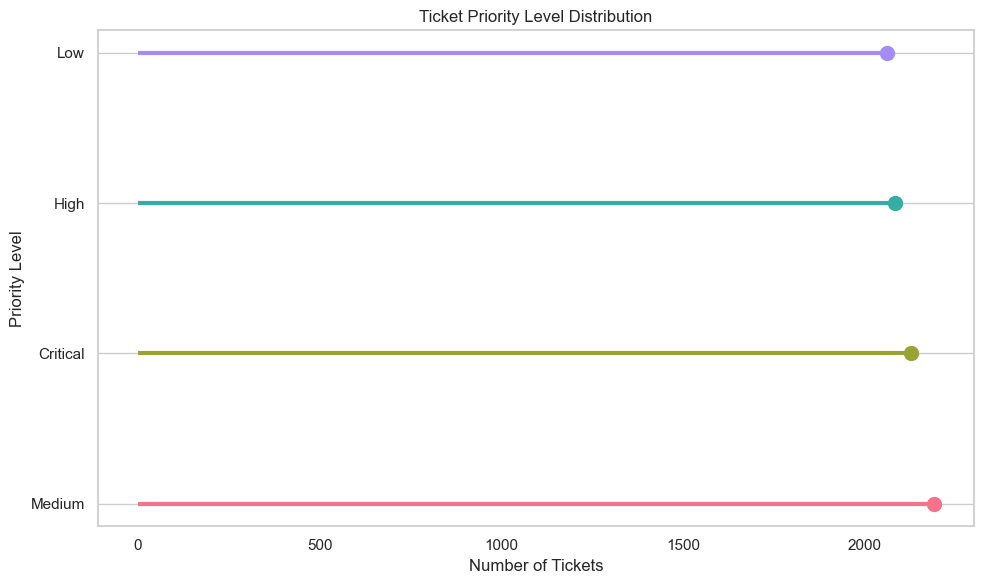

In [63]:
# Lollipop Chart with Different Colors for Each Priority
priority_distribution = data['Ticket Priority'].value_counts()
priorities = priority_distribution.index
counts = priority_distribution.values

# Generate unique colors for each point
colors = sns.color_palette('husl', len(priorities))  # husl gives a range of distinguishable colors
plt.figure(figsize=(10, 6))

# Horizontal lines with individual colors
for i in range(len(priorities)):
    plt.hlines(y=priorities[i], xmin=0, xmax=counts[i], color=colors[i], linewidth=3)
    plt.plot(counts[i], priorities[i], "o", color=colors[i], markersize=10)

plt.title('Ticket Priority Level Distribution')
plt.xlabel('Number of Tickets')
plt.ylabel('Priority Level')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Correlation Matrix

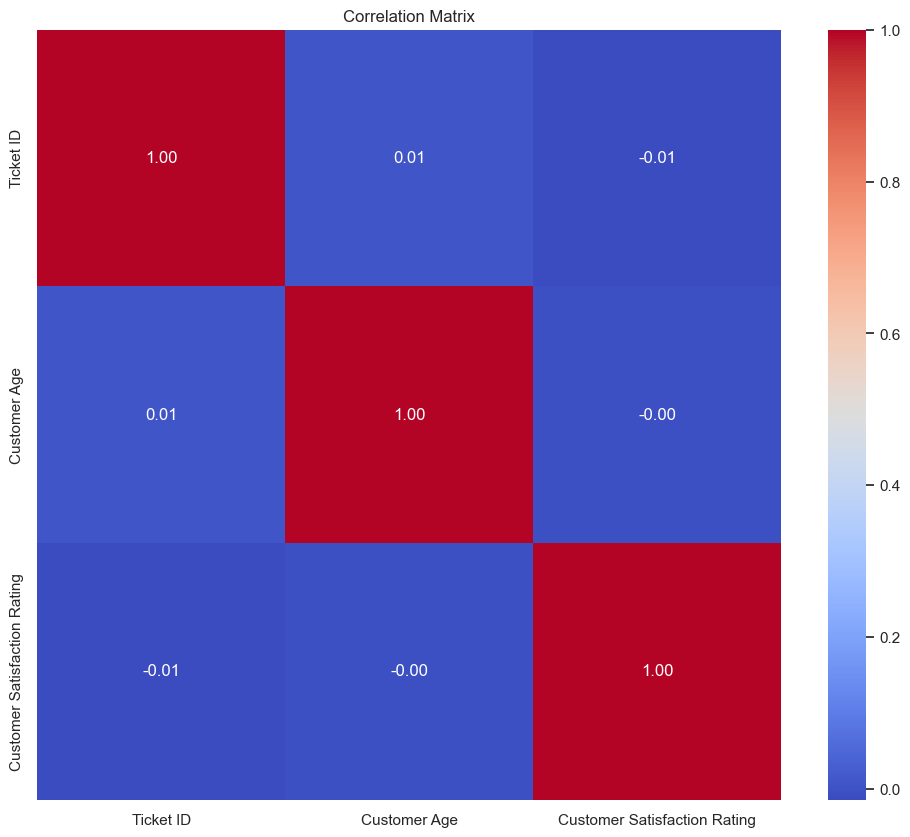

In [64]:
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing

**Handling Missing values**

In [65]:
data = data.dropna()

In [88]:
data.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
YearMonth                       0
Age Group                       0
dtype: int64

**Encoding categorical variables**

In [66]:
label_encoders = {}

for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [67]:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,YearMonth,Age Group
2,3,519,844,48,2,10,2020-07-14,4,8,53,0,343,2,3,1347,2153,3.0,2020-07,Mid-Age Adult (41-50)
3,4,475,252,27,0,25,2020-11-13,0,0,627,0,2549,2,3,946,293,3.0,2020-11,Young Adult (21-30)
4,5,34,251,67,0,5,2020-02-04,0,3,188,0,2657,2,1,96,2356,1.0,2020-02,Senior (61-70)
10,11,1297,1619,48,1,30,2021-01-19,1,3,1323,0,1368,1,2,2079,85,1.0,2021-01,Mid-Age Adult (41-50)
11,12,290,580,51,1,27,2021-10-24,2,15,360,0,1366,1,0,1452,1168,1.0,2021-10,Mature (51-60)


# Outlier Detection 

{'whiskers': [<matplotlib.lines.Line2D at 0x235ea6ce2a0>,
 'caps': [<matplotlib.lines.Line2D at 0x235ea6ce8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235ea6ce060>],
 'medians': [<matplotlib.lines.Line2D at 0x235ea6ceed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235ea6cf1a0>],
 'means': []}

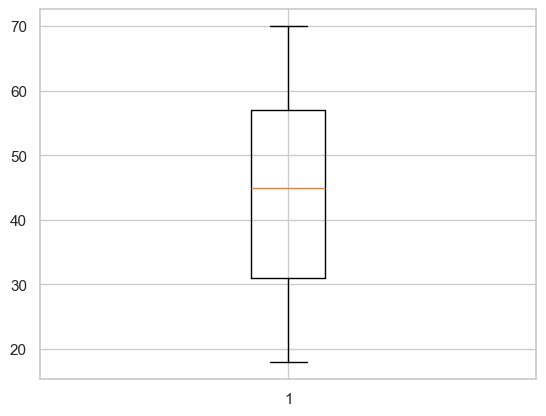

In [68]:
plt.boxplot(data['Customer Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x235ea7540e0>,
 'caps': [<matplotlib.lines.Line2D at 0x235ea7546b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235e71c89b0>],
 'medians': [<matplotlib.lines.Line2D at 0x235ea754c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x235ea754f20>],
 'means': []}

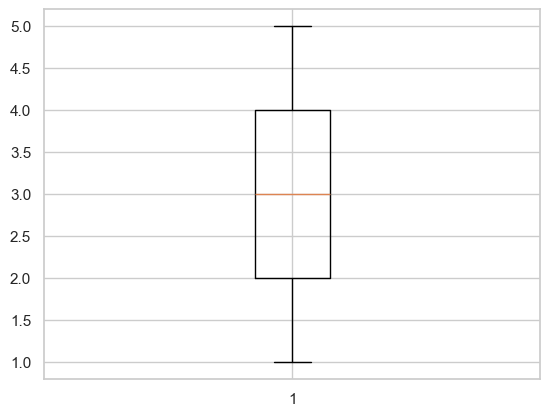

In [69]:
plt.boxplot(data['Customer Satisfaction Rating'])

In [70]:
features_to_check = ['Customer Age', 'Customer Satisfaction Rating']
for feature in features_to_check:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers")

Customer Age: 0 outliers
Customer Satisfaction Rating: 0 outliers


# Feature Engineering

**Define features and target variable**

In [71]:
X = data.drop(['Ticket ID', 'Customer Satisfaction Rating'], axis=1)
y = data['Customer Satisfaction Rating']

**Handling Non-Numeric Features**

In [72]:
for col in X.columns:
    if X[col].dtype == 'object':  # Convert categorical columns to numeric
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    elif pd.api.types.is_datetime64_any_dtype(X[col]):  # If column is datetime, extract the year
        X[col] = X[col].dt.year
    elif isinstance(X[col].dtype, pd.PeriodDtype):  # If column is a Period, convert to timestamp (numeric)
        X[col] = X[col].dt.year
    elif X[col].dtype.name == 'category':   # <== this was missing earlier
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

**Train-Test Split**

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Feature Scaling**

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [75]:
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

**Hyperparameter Tuning**

In [76]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


**Train the Model**

In [77]:
rfc_best = grid_search.best_estimator_

In [78]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

**Predict on Test Set**

In [79]:
y_pred = rfc_best.predict(X_test)

# Model Evaluation

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.1865222623345367
Classification Report:
               precision    recall  f1-score   support

         1.0       0.19      0.17      0.18       168
         2.0       0.16      0.11      0.13       174
         3.0       0.21      0.26      0.23       175
         4.0       0.20      0.23      0.22       162
         5.0       0.16      0.16      0.16       152

    accuracy                           0.19       831
   macro avg       0.18      0.19      0.18       831
weighted avg       0.18      0.19      0.18       831

Confusion Matrix:
 [[28 25 51 39 25]
 [28 20 50 39 37]
 [40 25 45 31 34]
 [23 26 39 37 37]
 [31 29 32 35 25]]


# Cross-Validation

In [81]:
cv_scores = cross_val_score(rfc_best, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.21299639 0.18772563 0.20397112 0.20938628 0.18083183]
Mean CV Accuracy: 0.19898224975682363


# Feature Importance Analysis

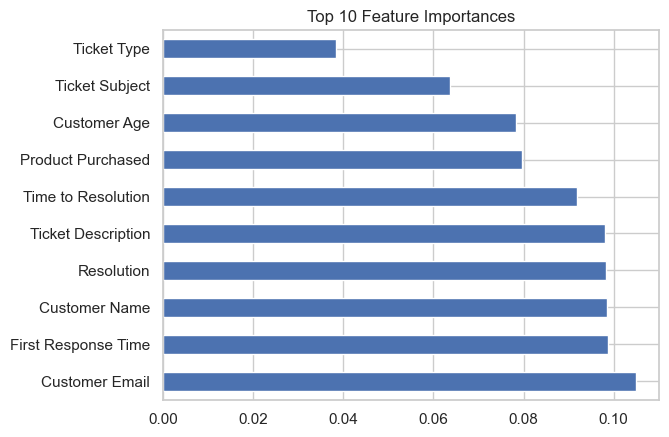

In [82]:
feature_importances = pd.Series(rfc_best.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()